# CS771A Assignment 3
\- Yash Gupta (190997)

## Q1. Perceptron Algorithm

In [2]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Let's read the dataset.

In [72]:
# names of the columns of the dataset
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
cols

['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [73]:
# reading the data
data = pd.read_csv('data_banknote_authentication.txt', names=cols)
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Q1. (a)
Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation as in the slides.

In [74]:
# the perceptron algorithm
def perceptron_algo(X, y, thresh=10000, eta=1, max_iter=10000):
    w = np.array([0.5, 0.5, 0.5, 0.5])
    t = 0
    t_mistake = 0
    while t - t_mistake < thresh and t < max_iter:
        idx = np.random.choice(np.arange(len(X)))
        X_n = X.loc[idx, :]
        y_n = y[idx]
        if y_n * np.dot(w, X_n) < 0:
            w += eta * y_n * X_n
            t_mistake = t
        t += 1
    return w

## Q1. (b)
Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess the dataset to handle missing and anomalous data.

In [75]:
# makes predictions using the given w
def predict(w, X):
    y = np.zeros(len(X))
    for i in range(len(X)):
        y[i] = 1 if np.dot(w, X.loc[i, :]) >= 0 else -1
    return y

In [76]:
# calculates the accuracy using the predicted and actual values
def accuracy(y_pred, y_actual):
    return (y_pred == y_actual).sum() / len(y_actual)

Now, let's preprocess the dataset.

In [77]:
# checking for missing data
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

There is no missing data.

In [78]:
# checking the data types of the columns
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [79]:
# changing the negative class label from 0 to -1
data['class'].replace(0, -1, inplace=True)
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [80]:
# remove outliers using the interquartile range method
q25, q75 = np.percentile(data.drop('class', axis=1), 25, axis=0), np.percentile(data.drop('class', axis=1), 75, axis=0)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
data = data.loc[[(((data.drop('class', axis=1).loc[i] >= lower) & (data.drop('class', axis=1).loc[i] <= upper)).sum() == 4) for i in range(len(data))], :]
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,-1
1,4.54590,8.16740,-2.45860,-1.46210,-1
2,3.86600,-2.63830,1.92420,0.10645,-1
3,3.45660,9.52280,-4.01120,-3.59440,-1
4,0.32924,-4.45520,4.57180,-0.98880,-1
...,...,...,...,...,...
1363,-1.16670,-1.42370,2.92410,0.66119,1
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1


In [81]:
# standardizing the features except the target variable
for col in cols[:-1]:
    data.loc[:, col] = (data.loc[:, col] - data.loc[:, col].mean()) / data.loc[:, col].std()
data

/home/yashbg/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,variance,skewness,curtosis,entropy,class
0,1.078409,1.202941,-1.037066,0.299985,-1
1,1.423167,1.109087,-0.939557,-0.229004,-1
2,1.169569,-0.924506,0.286027,0.588391,-1
3,1.016865,1.364168,-1.373718,-1.340177,-1
4,-0.149622,-1.266440,1.026388,0.017640,-1
...,...,...,...,...,...
1363,-0.707598,-0.695923,0.565634,0.877474,1
1366,-1.171342,0.276488,-0.364502,-0.142082,1
1367,-0.120939,-0.174073,-0.657545,0.241360,1
1368,-0.790403,-1.345878,1.559261,0.711030,1


In [82]:
X = data.drop('class', axis=1)
y = data['class']

## Q1. (c)
Train the algorithm on the dataset using cross-validation and report cross-validated test set error

Let's prepare the training, validation and test data. 

In [83]:
# shuffling the rows of the dataframe
data_shuffle = data.sample(frac=1, random_state=1)
data_shuffle

,variance,skewness,curtosis,entropy,class
137,1.604480,1.115712,-0.986256,-0.005967,-1
1213,-1.249671,-1.718168,1.486416,0.208342,1
405,-0.052427,0.969671,0.093386,-1.009321,-1
255,1.272701,-1.120400,0.818424,1.382179,-1
1019,-0.577237,0.208342,-1.277860,-1.268054,1
...,...,...,...,...,...
732,-1.284844,1.727519,0.337759,-1.532207,-1
945,-0.932514,0.218072,-0.591635,-0.706762,1
1161,-0.009503,-0.395667,-0.751447,0.721140,1
242,0.339508,0.239884,0.138435,0.343107,-1


In [84]:
# performing train-test split with 20% of the data as the test data
train_size = int(0.8 * len(data))
data_train = data_shuffle[:train_size].reset_index(drop=True)
data_test = data_shuffle[train_size:].reset_index(drop=True)

In [85]:
# change cross-val method

In [86]:
# splits the dataset for cross-validation
def data_split(data):
    data_shuffle = data.sample(frac=1)
    data_shuffle
    train_size = int(0.8 * len(data))
    data_train = data_shuffle[:train_size].reset_index(drop=True)
    data_val = data_shuffle[train_size:].reset_index(drop=True)
    return data_train, data_val

Now, let's perform the cross-validation and tune the hyperparameter `thresh` which is the number of no-mistake iterations after which we can say that the algorithm has converged. 

In [88]:
accuracy_dict = {}
for k in range(5):
    data_train_crossval, data_val = data_split(data_train)
    X_train = data_train_crossval.drop('class', axis=1)
    y_train = data_train_crossval['class']
    X_val = data_val.drop('class', axis=1)
    y_val = data_val['class']
    for thresh in range(50, 500, 50):
        if k == 0:
            accuracy_dict[thresh] = 0
        w = perceptron_algo(X_train, y_train, thresh, 1, 10000)
        y_pred = predict(w, X_val)
        acc = accuracy(y_pred, y_val)
        accuracy_dict[thresh] += acc
best_acc = 0
best_thresh = 0
for thresh, acc in accuracy_dict.items():
    acc /= 5
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh
print('The cross-validated accuracy is', best_acc, 'using a threshold of', best_thresh)

The cross-validated accuracy is 0.9717073170731707 using a threshold of 150


## Q1. (d)
Ensure you use a held out validation set and report F1 score on the held out set for your best model

Let's run the perceptron algorithm on the test set using the optimal threshold we got from cross-validation. 

In [89]:
X_train = data_train.drop('class', axis=1)
y_train = data_train['class']
X_test = data_test.drop('class', axis=1)
y_test = data_test['class']
w = perceptron_algo(X_train, y_train, best_thresh, 1, 10000)
y_pred = predict(w, X_test)
acc = accuracy(y_pred, y_test)
print('The test set accuracy is', acc, 'using a threshold of', best_thresh)

The test set accuracy is 0.984375 using a threshold of 150


Now, let's find the F1 score.

In [90]:
tp = ((y_pred == y_test) & (y_test == 1)).sum()
fn = ((y_pred != y_test) & (y_test == 1)).sum()
fp = ((y_pred != y_test) & (y_test == -1)).sum()
tn = ((y_pred == y_test) & (y_test == -1)).sum()
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * p * r / (p + r)
print('F1 score on the test set is', f1, 'using a threshold of', best_thresh)

F1 score on the test set is 0.9814814814814815 using a threshold of 150


## Q2. MCMC Sampling

## Q2. (a)
Write a function to calculate the Bayesian posterior probability given 50 new data samples drawn from a normal distribution with mean 10 and SD 5, assuming a normal prior with mean 25 and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how you derive the likelihood from the data.

Normal Distribution:
$$ p(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right) $$

Normal likelihood:
$$ p(\textbf{y} | \mu, \sigma^2) = \prod_{n = 1}^N p(y_n | \mu, \sigma) = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left(- \frac{1}{2 \sigma^2} \sum_{n = 1}^N \left( y_n - \mu \right)^2 \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \left( \sum_n y_n^2 - 2 \mu \sum_n y_n + N \mu^2 \right) \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \sum_n y_n^2 \right) \exp \left( - \frac{N}{2 \sigma^2} \left(- 2 \mu \overline{y} + \mu^2 \right) \right) $$
$$ = \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \left( \sum_n y_n^2 - N \overline{y}^2 \right) \right) \exp \left( - \frac{N}{2 \sigma^2} (\mu - \overline{y})^2 \right) $$
$$ \propto \exp \left( - \frac{N}{2 \sigma^2} (\mu - \overline{y})^2 \right) $$
$$ \propto N \left( \overline{y}, \frac{\sigma^2}{N} \right) $$

Normal prior:
$$ p(\mu | \mu_0, \sigma_0^2) = \frac{1}{\sigma_0 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 \right) $$
<!-- $$ p(\mu | \mu_0, \sigma_0^2) = p(\mu | 25, 25) = \frac{1}{5 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - 25}{5} \right)^2 \right) $$ -->

Posterior:
$$ p(\mu | \textbf{y}) = \frac{p(\mu) p(\textbf{y} | \mu)}{p(\textbf{y})} $$
$$ \propto p(\mu) p(\textbf{y} | \mu) $$
<!-- $$ \propto p(\mu) p(\overline{y} | \mu) $$ -->
<!-- $$ \propto p(\overline{y}) p(\mu | \overline{y}) $$
$$ \propto p(\mu | \overline{y}) $$ -->
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 \right) \exp \left( - \frac{N}{2 \sigma^2} (\mu - \overline{y})^2 \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \left( \frac{\mu - \mu_0}{\sigma_0} \right)^2 + \left( \frac{N}{\sigma^2} (\mu - \overline{y})^2 \right) \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{\mu^2}{\sigma_0^2} - \frac{2 \mu \mu_0}{\sigma_0^2} + \frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2} - \frac{2 N \overline{y} \mu}{\sigma^2} + \frac{N \mu^2}{\sigma^2} \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \mu^2 - 2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2} \right) \mu + \left( \frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2} \right) \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \left( \mu^2 - 2 \left( \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right) \mu + \frac{\frac{\mu_0^2}{\sigma_0^2} + \frac{N \overline{y}^2}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right) \right) $$
$$ \propto \exp \left( - \frac{1}{2} \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right) \left( \mu - \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right)^2 \right) $$
$$ \propto \exp \left( - \frac{1}{2} \frac{\left( \mu - \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} \right)^2}{\left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right)^{-1}} \right) $$

<!-- where
$$ p(\textbf{y}) = \int p(\mu) p(\textbf{y} | \mu) d \theta $$

Hence, 
$$ p(\mu | \textbf{y}) = \frac{\frac{1}{5 \sqrt{2 \pi}} \exp \left(- \frac{1}{2} \left( \frac{\mu - 25}{5} \right)^2 \right) \frac{1}{\sigma^N (2 \pi)^{\frac{N}{2}}} \exp \left( - \frac{1}{2 \sigma^2} \sum_{n = 1}^N \left( y_n - \mu \right)^2 \right)}{p(\textbf{y})} $$ -->

Hence, Posterior:
$$ p(\mu | \textbf{y}) \sim N(\mu_1, \sigma_1^2) = \frac{1}{\sigma_1 \sqrt{2 \pi}} \exp \left( - \frac{1}{2} \left( \frac{\mu - \mu_1}{\sigma_1} \right)^2 \right) $$
where
$$ \mu_1 = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{N \overline{y}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}} $$
$$ \sigma_1^2 = \left( \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \right)^{-1} $$

Now, let's create the functions to calculate the normal, likelihood and posterior. 

In [13]:
def normal(x, mu=0, sigma=1):
    exp = -(((x - mu) / sigma) ** 2) / 2
    p = np.exp(exp) / (sigma * np.sqrt(2 * np.pi))
    return p

We saw above that the normal likelihood is proportional to $ N(\overline{y}, \frac{\sigma^2}{N}) $. Hence, we will plot the likelihood as $ N(\overline{y}, \frac{\sigma^2}{N}) $ because $ \prod_{n = 1}^N p(y_n | \mu, \sigma) $ will give a very small likelihood which would have to be scaled up anyway to be able to be compared with the prior and the posterior. 

In [14]:
# def likelihood(mu, y, sigma=1):
#     l = 1
#     for y_n in y:
#         l *= normal(y_n, mu, sigma)
#     return l

In [15]:
def likelihood(mu, y, sigma=1):
    n = len(y)
    y_bar = 0
    for y_n in y:
        y_bar += y_n
    y_bar /= n

    sigma_l = sigma / np.sqrt(n)
    l = normal(mu, y_bar, sigma_l)
    return l

In [16]:
def posterior(mu, y, mu0=0, sigma0=1, sigma=1):
    n = len(y)
    y_bar = 0
    for y_n in y:
        y_bar += y_n
    y_bar /= n

    num_mu1 = (mu0 / (sigma0 ** 2)) + (n * y_bar / (sigma ** 2))
    den_mu1 = (1 / (sigma0 ** 2)) + (n / (sigma ** 2))
    mu1 = num_mu1 / den_mu1

    sigma1_sq_inv = (1 / (sigma0 ** 2)) + (n / (sigma ** 2))
    sigma1_sq = 1 / sigma1_sq_inv
    sigma1 = np.sqrt(sigma1_sq)

    return normal(mu, mu1, sigma1)

Now, let's plot the prior, likelihood and posterior on the same graph. 

In [18]:
# x = np.linspace(5, 45, 1000)
# y = np.random.normal(10, 5, 50)
# prior = normal(x, 25, 5)
# l = likelihood(x, y, 5)
# post = posterior(x, y, 25, 5, 5)
# plt.plot(x, prior / prior.max(), label='prior')
# plt.plot(x, l / l.max(), label='likelihood') #
# plt.plot(x, post / post.max(), label='posterior') #
# plt.xlabel('x')
# plt.ylabel('p')
# plt.title('Bayesian Posterior Probability')
# plt.legend()
# plt.show()

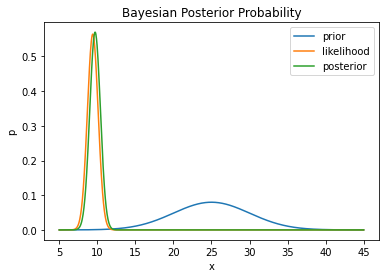

In [17]:
x = np.linspace(5, 45, 1000)
y = np.random.normal(10, 5, 50)
prior = normal(x, 25, 5)
l = likelihood(x, y, 5)
post = posterior(x, y, 25, 5, 5)
plt.plot(x, prior, label='prior')
plt.plot(x, l, label='likelihood') #
plt.plot(x, post, label='posterior') #
plt.xlabel('x')
plt.ylabel('p')
plt.title('Bayesian Posterior Probability')
plt.legend()
plt.show()

## Q2. (b)
Implement the Metropolis algorithm from the lecture slides to estimate the posterior distribution given the same prior and data and show that it converges to the analytic posterior by plotting a histogram of samples from the distribution alongside the analytic posterior distribution. Assume whatever SD (width) you want for the proposal distribution.

Metropolis-Hastings algorithm which runs for `num_iter` iterations:

In [19]:
def metropolis_hastings(prior, likelihood, y, mu0=0, sigma0=1, sigma=1, num_iter=1000, proposal_width=1):
    hist = [0.0]
    mu_last = 0.0
    for i in range(num_iter):
        mu_curr = np.random.normal(mu_last, proposal_width)
        r = (prior(mu_curr, mu0, sigma0) * likelihood(mu_curr, y, sigma)) / (prior(mu_last, mu0, sigma0) * likelihood(mu_last, y, sigma))
        a = np.random.uniform(0, 1)
        if r <= a:
            mu_curr = mu_last
        hist.append(mu_curr)
        mu_last = mu_curr
    return hist

Let's plot the histogram we get from the Metropolis-Hastings algorithm and the posterior we calculated before to see if the Metropolis-Hastings algorithm is able to estimate the posterior distribution. 

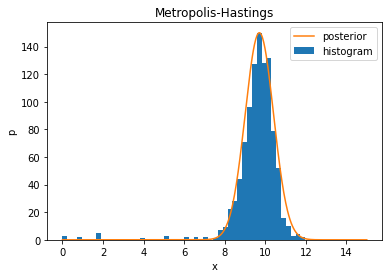

In [20]:
hist = metropolis_hastings(normal, likelihood, y, 25, 5, 5)
x = np.linspace(0, 15, 500)
y_hist, x_hist, _ = plt.hist(hist, 50, label='histogram')
post = posterior(x, y, 25, 5, 5)
plt.plot(x, post / post.max() * y_hist.max(), label='posterior')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Metropolis-Hastings')
plt.legend()
plt.show()

As we can see, the histogram is able to estimate the posterior distribution fairly well when we took the proposal width to be 1. 

## Q2. (c)
How does the speed of convergence of the sampling depend on the proposal width? Is there an optimal proposal width that would work best? Demonstrate the consequences of using sub-optimal proposal width and terminating sampling too soon.

Now, we will introduce `thresh` and `max_iter` in the Metropolis-Hastings algorithm to see for which proposal width the algorithm converges the fastest (takes the least number of iterations to converge). 

In [21]:
def metropolis_hastings2(prior, likelihood, y, mu0=0, sigma0=1, sigma=1, max_iter=10000, thresh=100, proposal_width=1):
    hist = [0.0]
    mu_last = 0.0
    t = 0
    t_change = 0
    while t - t_change < thresh and t < max_iter:
        mu_curr = np.random.normal(mu_last, proposal_width)
        r = (prior(mu_curr, mu0, sigma0) * likelihood(mu_curr, y, sigma)) / (prior(mu_last, mu0, sigma0) * likelihood(mu_last, y, sigma))
        a = np.random.uniform(0, 1)
        if r <= a:
            mu_curr = mu_last
        hist.append(mu_curr)
        if mu_curr != mu_last:
            t_change = t
        mu_last = mu_curr
        t += 1
    return hist, t

Now, let's find out the optimal width using the new Metropolis-Hastings algorithm. 

In [12]:
min_t = float('inf')
optimal_width = 0
for width in range(5, 50, 5):
    hist, t = metropolis_hastings2(normal, likelihood, y, 25, 5, 5, 10000, 100, width)
    if t < min_t:
        min_t = t
        optimal_width = width
print('Optimal width is', optimal_width, 'which takes', min_t, 'iterations to converge.')

Optimal width is 15 which takes 112 iterations to converge.


Now, let's plot the histogram using the optimal width to see if the algorithm is able to estimate the posterior distribution properly. 

In [ ]:
hist, t = metropolis_hastings2(normal, likelihood, y, 25, 5, 5, 10000, 100, optimal_width)
x = np.linspace(0, 15, 500)
y_hist, x_hist, _ = plt.hist(hist, 50, range=(0, 20), label='histogram')
post = posterior(x, y, 25, 5, 5)
plt.plot(x, post / post.max() * y_hist.max(), label='posterior')
plt.xlim([5, 15])
plt.xlabel('x')
plt.ylabel('p')
plt.title('Metropolis-Hastings')
plt.legend()
plt.show()

As we can see, using a proposal width of 35, the algorithm takes the least number of iterations to converge. But the histogram is not able to estimate the posterior distribution properly, as there are too little samples to create the histogram. 

On the other hand, using a sub-optimal proposal width, although takes more time to converge, but gives a lot of samples and hence creates a much better histogram which is able to estimate the posterior distribution properly as we say before. 

So, there is a tradeoff between the speed of convergence and the accuracy of the histogram in estimation of the posterior distribution. 